In [1]:
import torch
import torchvision
import os
import bilinear_resnet
import CUB_200


In [2]:
batch_size = 48
num_classes = 200
cub200_path = 'data'
save_model_path = 'D:\\Code\\BilinearCNN\\data\\model_saved\\CUB_200'

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = bilinear_resnet.BCNN(num_classes, pretrained=False).to(device)
model.load_state_dict(torch.load(os.path.join(save_model_path,
                                              'resnet34_CUB_200_fine_tuning_epoch_30_acc_83.8281.pth'),
                                 map_location=lambda storage, loc: storage))

test_transform = torchvision.transforms.Compose([torchvision.transforms.Resize(448),
                                                     torchvision.transforms.CenterCrop(448),
                                                     torchvision.transforms.ToTensor(),
                                                     torchvision.transforms.Normalize([0.4856, 0.4994, 0.4324],
                                                                                      [0.1817, 0.1811, 0.1927])])

test_data = CUB_200.CUB_200(cub200_path, train=False, transform=test_transform)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)


Read the test dataset...
Read successfully!


In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
loader_iter=iter(test_loader)
images,labels=loader_iter.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

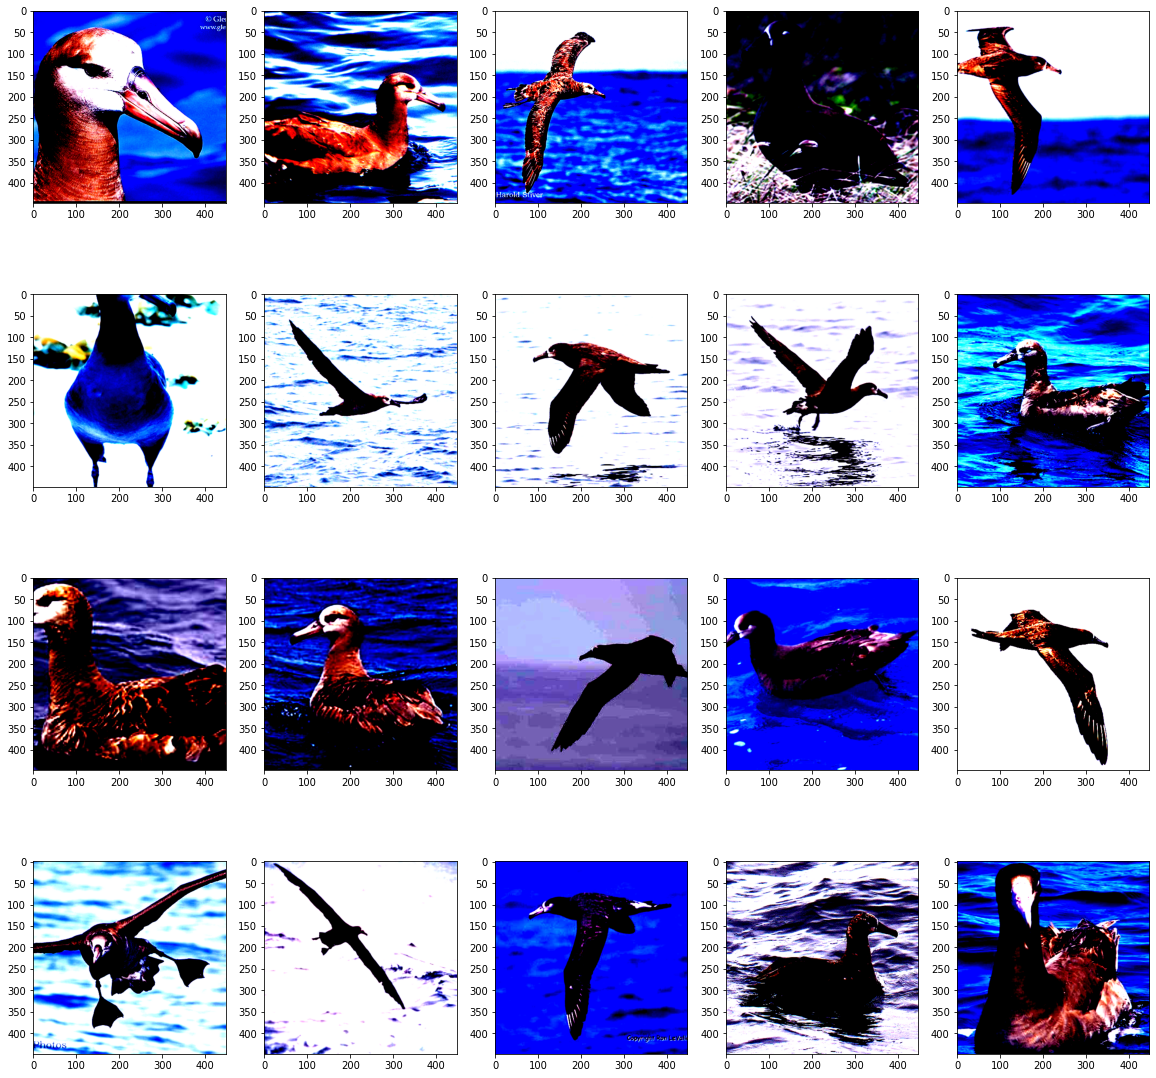

In [21]:
plt.figure(figsize=(20,20))
plt.title('input images')
for i in range(20):
    im=images[i,:]
    imt=torch.transpose(torch.transpose(im,1,2),0,2)
    plt.subplot(4,5,i+1)
#     plt.title(str(i))
    plt.imshow(imt)
plt.show()